<a href="https://colab.research.google.com/github/avrland/polishNewsTitleDatabase/blob/main/GoogleNews_scrapper_to_textfile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies import

In [58]:
!pip install GoogleNews
!pip install gnewsclient
from GoogleNews import GoogleNews
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import hashlib
import os

# Enter parameters and tags of collected newses

In [53]:
newsLang = 'pl' 
rawFileName = "titles.txt" 
finalFileName = "titlesWithoutDuplicates.txt"
newsTags = [ "swiat", "koronawirus", "pis", "polska", "sport", "apple", "samsung", "technologia", "COVID-19", "amazon", "google", "gospodarka", "chiny", "rozrywka", "nauka"]

# saveToFile function
Saves prepared **inputArray** of titles to text file **savedTitlesFilename**

In [54]:
def saveToFile(inputArray, outputFileName):
  file_object = open(outputFileName, 'a', encoding="utf-8")
  for count in range(0, len(inputArray['title'])):
      single_article = inputArray['title'][count]
      file_object.write('\n' + single_article)
  file_object.close()

# Remove duplicates
We don't want duplicated titles. So we remove them, creating **finalFileName** from **rawFileName**.

In [56]:
def removeDuplicates(inFileName, outFileName):
  x = 0
  lines_seen = set() # holds lines already seen
  with open(outFileName, "w", encoding="utf-8") as output_file:
      for each_line in open(inFileName, "r", encoding="utf-8"):
          if each_line not in lines_seen: # check if line is not duplicate
              output_file.write(each_line)
              lines_seen.add(each_line)
          else:
              x = x+1
  print("Duplicates removed: " + str(x))


# Download newses from Google News
We download newses from last 24h. We insert them in **output** pandas dataframe. Then we save it into **rawFileName** and remove duplicates saving it in **finalFileName**.

In [57]:
x = 0
for tag in newsTags:
  print("Collecting newses from tag: " + tag + "...")
  googlenews = GoogleNews()
  googlenews.clear()
  googlenews.set_lang(newsLang)
  #googlenews.set_time_range('01/03/2020','10/03/2021')
  googlenews.setperiod('1d')
  googlenews.get_news(tag)
  output = googlenews.results(sort=True)
  output = pd.DataFrame(output)
  x = x + len(output['title'])
  saveToFile(output, rawFileName)
print("Collected amount of news: " + str(x))
removeDuplicates(rawFileName, finalFileName)

Collected amount of news: 1051
Duplicates removed: 88


If you want to collect more data in single file, delete bufor file and rename final file into titles.txt

In [59]:
os.remove(rawFileName) #delete bufor file
os.rename(finalFileName,rawFileName) #rename final file to bufor name

# Pandas playground
DataFrame w zmiennej **output**

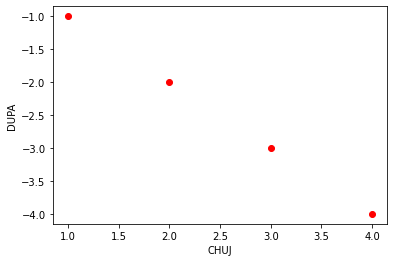

In [ ]:
plt.plot([1, 2, 3, 4], [-1, -2, -3, -4], 'ro')
plt.ylabel("DUPA")
plt.xlabel("CHUJ")
plt.show()